### Visualizing training data to see scattered data to get intusion what kind of classifier paramter could fit best

In [2]:
#!/usr/bin/python
import sys
sys.path.append("tools/")
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from sklearn.metrics import accuracy_score

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

grade_fast_test = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_train[ii]==0]
bumpy_fast_test = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_train[ii]==0]
grade_slow_test = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_train[ii]==1]
bumpy_slow_test = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_train[ii]==1]

#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "r", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "b", label="slow")
plt.scatter(bumpy_fast_test, grade_fast_test, color = "k", label="test data")
plt.scatter(grade_slow_test, bumpy_slow_test, color = "k")


plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################

In [3]:
# initialising two array to store classifier name and its accuracy to finaly visualise the results 
classifier_name=[]
classifier_accuracy=[]

### SVM - Support Vector Machine 

Accuracy Score: 0.92


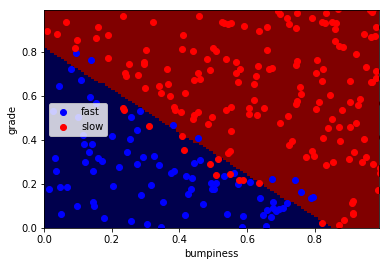

In [4]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(features_train, labels_train)
pred=clf.predict(features_test)
print 'Accuracy Score:',accuracy_score(labels_test,pred)
clfName='SVM'
classifier_name.append(clfName)
classifier_accuracy.append(accuracy_score(labels_test,pred))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### Decision Tree

Accuracy Score: 0.912


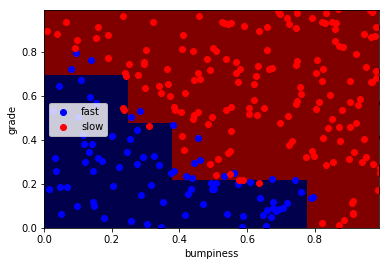

In [5]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(min_samples_split=60)
clf.fit(features_train, labels_train)
pred=clf.predict(features_test)
print 'Accuracy Score:',accuracy_score(labels_test,pred)
clfName='Decision Tree'
classifier_name.append(clfName)
classifier_accuracy.append(accuracy_score(labels_test,pred))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### Naive Bayes

Accuracy Score: 0.884


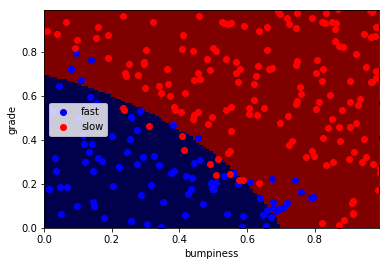

In [6]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(features_train, labels_train)
pred=clf.predict(features_test)
print 'Accuracy Score:',accuracy_score(labels_test,pred)
clfName='Naive Bayes'
classifier_name.append(clfName)
classifier_accuracy.append(accuracy_score(labels_test,pred))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### KNN Classifier

Accuracy Score: 0.94


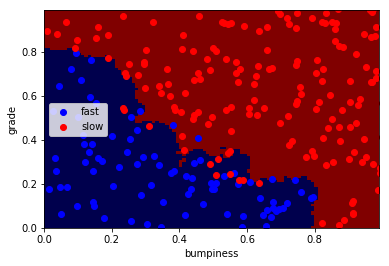

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(features_train, labels_train)
clfName='KNN'
pred=clf.predict(features_test)
print 'Accuracy Score:',accuracy_score(labels_test,pred)
classifier_name.append(clfName)
classifier_accuracy.append(accuracy_score(labels_test,pred))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### AdaBoost Classifier

Accuracy Score: 0.924


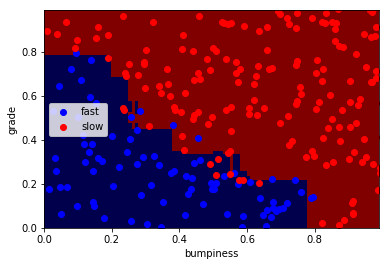

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(features_train, labels_train)
pred=clf.predict(features_test)
scores = cross_val_score(clf, features_train,labels_train)
#print(scores.mean())
print 'Accuracy Score:',accuracy_score(labels_test,pred)
clfName='Decision Tree'
classifier_name.append(clfName)
classifier_accuracy.append(accuracy_score(labels_test,pred))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### Random Forest

Accuracy Score: 0.92


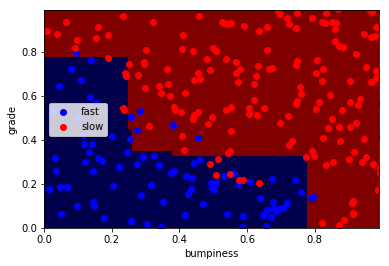

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(features_train, labels_train)
pred=clf.predict(features_test)
print 'Accuracy Score:',accuracy_score(labels_test,pred)
clfName='Random Forest'
classifier_name.append(clfName)
classifier_accuracy.append(accuracy_score(labels_test,pred))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

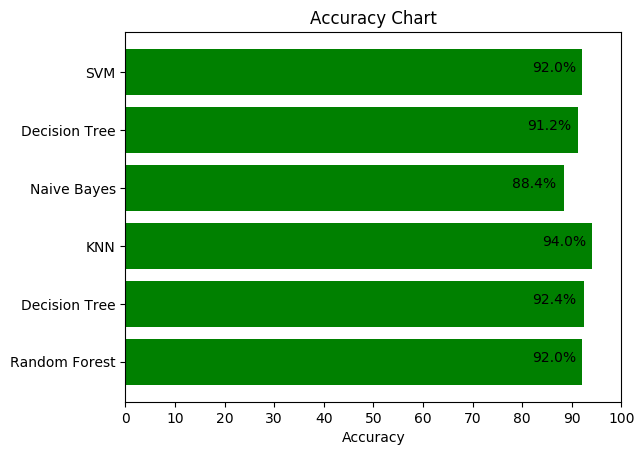

In [10]:
"""
====================
Horizontal bar chart
====================
"""
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
fig, ax = plt.subplots()

# Example data
name = classifier_name
y_pos = np.arange(len(name))
performance = np.array(classifier_accuracy)
performance=(performance*100)
tick_label=performance.astype('str')
ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(name)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy Chart')
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
for i in range(len(name)):
    ax.annotate(tick_label[i]+'%',xy=(int(performance[i]-10), i))
plt.show()

In [11]:
print len(labels_train)

750


In [12]:
print len(labels_test)

250


In [13]:
print features_train[0], labels_train[0]

[0.6394267984578837, 0.09935462460613032] 0.0
